### Set environment

In [26]:
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys
sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


### CPU

In [14]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "~/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001 ~/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001 ~/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009 ~/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002 bin/demo.mp4 CPU 0.9 results/cpu"
        
print(cpu_job_id[0])

30942.v-qsvr-1.devcloud-edge


### GPU

In [15]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-hd-530 -F "~/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001 ~/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001 ~/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009 ~/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002 bin/demo.mp4 GPU 0.9 results/gpu"
        
print(gpu_job_id[0])

30943.v-qsvr-1.devcloud-edge


### FPGA

In [16]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "~/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001 ~/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001 ~/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009 ~/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002 bin/demo.mp4 HETERO:FPGA,CPU 0.9 results/fpga"
        
print(fpga_job_id[0])

30944.v-qsvr-1.devcloud-edge


### VPU

In [18]:
#Submit job to the queue
vpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:intel-ncs2 -F "~/intel/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001 ~/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001 ~/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009 ~/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002 bin/demo.mp4 MYRIAD 0.9 results/vpu"
        
print(vpu_job_id[0])

30948.v-qsvr-1.devcloud-edge


### Get result

In [20]:
import matplotlib.pyplot as plt

#device_list=['cpu', 'gpu', 'fpga', 'vpu']
device_list=['cpu', 'gpu', 'fpga']
inference_time=[]
fps=[]
model_load_time=[]

for device in device_list:
    with open('results/'+device+'/stdout.log', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

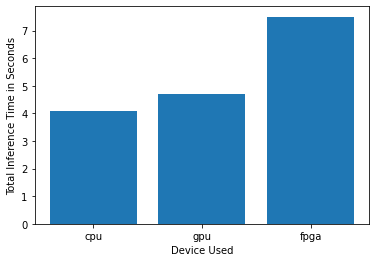

In [21]:
plt.bar(device_list, inference_time)
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

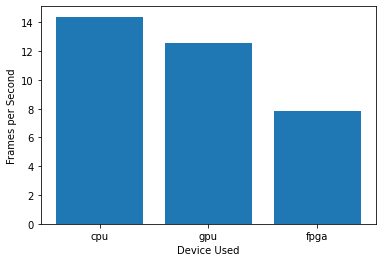

In [22]:
plt.bar(device_list, fps)
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

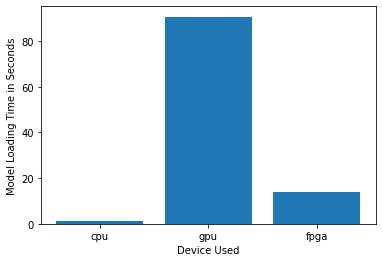

In [23]:
plt.bar(device_list, model_load_time)
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()